In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
0    0
1    0
2    0
Name: target, dtype: int64


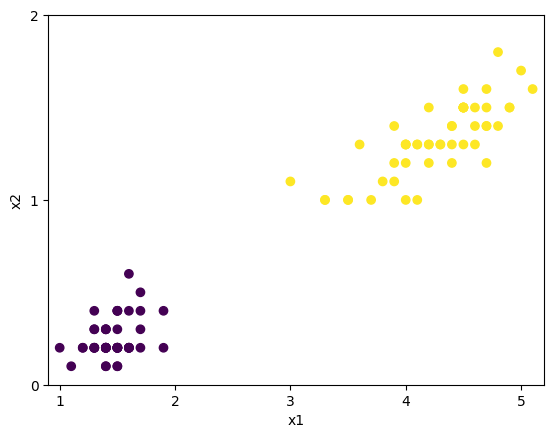

In [30]:
X_iris, Y_iris = load_iris(return_X_y=True, as_frame=True)
# return_X_ybool, If True, returns (data, target) instead of a Bunch object.
# as_frame, If True, the data is a pandas DataFrame including columns with appropriate dtypes (numeric)

print(X_iris.head(3))

# seleciona coluna de pétada e target de 0 e 1, pega somente os campos petal length e petal width da base de dados originais
X = X_iris.loc[Y_iris.isin([0, 1]), ['petal length (cm)', 'petal width (cm)']]
Y = Y_iris.loc[Y_iris.isin([0,1])]

# verifica o valor de y
Y.value_counts()
print(Y.head(3))

fig, ax = plt.subplots()

# cria o gráfico com relação de duas variáveis
ax.scatter(X.iloc[:,0],X.iloc[:,1],c=Y)
ax.set(xlim=(0.9,5.2),xticks=[1,2,3,4,5],ylim=(0,2),yticks=[0,1,2])
plt.ylabel('x2')
plt.xlabel('x1')
plt.show()

In [32]:
# treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

print(X_train.head(3))

print(y_train.head(3))

    petal length (cm)  petal width (cm)
28                1.4               0.2
93                3.3               1.0
5                 1.7               0.4
28    0
93    1
5     0
Name: target, dtype: int64


In [14]:
# criando classificador
clf = Perceptron(tol=1e-3, random_state=0, eta0=0.1)

In [15]:
# fit com os dados
clf = clf.fit(X_train, y_train)

In [16]:
# fazendo previsão
y_pred = clf.predict(X_test)

In [17]:
# Importando a matriz de confusão
from sklearn.metrics import confusion_matrix

In [18]:
# Avaliando o modelo
confusion_matrix(y_test, y_pred)

array([[19,  0],
       [ 0, 14]])

In [19]:
# petal length x1, petal width x2
X_train.head(3)

,petal length (cm),petal width (cm)
28,1.4,0.2
93,3.3,1.0
5,1.7,0.4


In [20]:
# primeiro x1, resultado do perceptron
y_train.head(3)

28    0
93    1
5     0
Name: target, dtype: int64

In [21]:
# verificando o coef (pesos w1 e w2)
clf.coef_
#clf.coef_[0][0] = 112
#clf.coef_[0][1] = 111
print(clf.coef_)

[[0.08 0.08]]


In [33]:
# e o intercept
clf.intercept_
#clf.intercept_ = 65
print(clf.intercept_)

65


In [ ]:
# w0, w1 e w2
bias = clf.intercept_
w1 = round(clf.coef_[0][0],2)
w2 = round(clf.coef_[0][1],2)
print(bias,w1,w2)

[-0.2] 0.08 0.08


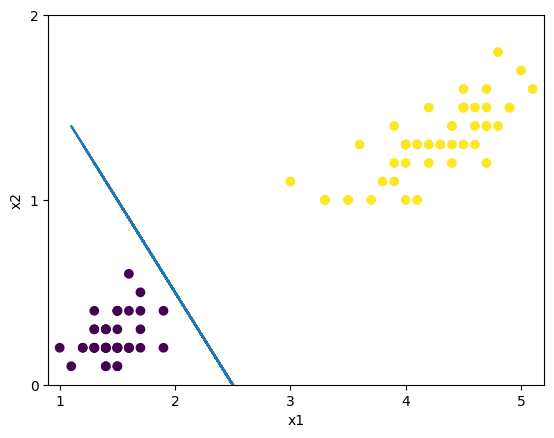

In [ ]:
fig, ax = plt.subplots()

ax.scatter(X_train.iloc[:,0], X_train.iloc[:,1],c=y_train)
ax.plot(X_train.iloc[:,0], (-w1*X_train.iloc[:,0]-bias)/w2)
ax.scatter(X_test.iloc[:,0],X_test.iloc[:,1],c=y_test)
ax.set(xlim=(0.9,5.2),xticks=[1,2,3,4,5],ylim=(0,2),yticks=[0,1,2])
plt.ylabel('x2')
plt.xlabel('x1')
plt.show()